In [14]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [12]:
x=np.array([[1.0,1.0],[1.5,2.0],[3.0,4.0],[5.0,7.0],[3.5,5.0],[4.5,5.0]])
y=np.array(['A','A','B','B','B','B'])

In [16]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [18]:
new_point=np.array([[2.0,3.0]])
predicted_class=knn.predict(new_point)

In [20]:
print('The predicted class is:',predicted_class[0])

The predicted class is: A


In [22]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

In [24]:
df=pd.read_csv('cardata.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [26]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder as LE

In [38]:
encoded_df = pd.get_dummies(df, columns=["Car_Name","Fuel_Type","Seller_Type","Transmission"])

In [40]:
print(encoded_df)

     Year  Selling_Price  Present_Price  Kms_Driven  Owner  Car_Name_800  \
0    2014           3.35           5.59       27000      0         False   
1    2013           4.75           9.54       43000      0         False   
2    2017           7.25           9.85        6900      0         False   
3    2011           2.85           4.15        5200      0         False   
4    2014           4.60           6.87       42450      0         False   
..    ...            ...            ...         ...    ...           ...   
296  2016           9.50          11.60       33988      0         False   
297  2015           4.00           5.90       60000      0         False   
298  2009           3.35          11.00       87934      0         False   
299  2017          11.50          12.50        9000      0         False   
300  2016           5.30           5.90        5464      0         False   

     Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0               

In [44]:
x=encoded_df.drop("Owner",axis=1).values
y=encoded_df["Owner"].values

In [46]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [56]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix

In [64]:
cm=confusion_matrix(y_test,y_pred)

In [66]:
cm

array([[89,  0],
       [ 2,  0]], dtype=int64)

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

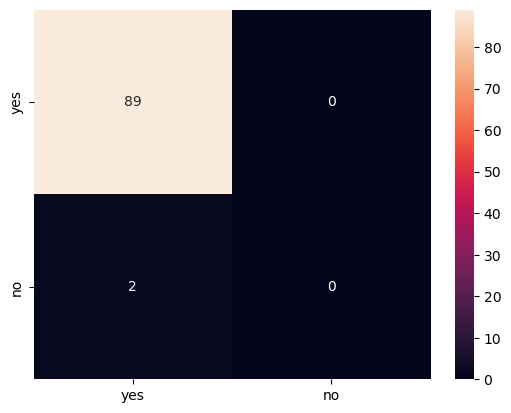

In [78]:
sns.heatmap(cm,
           annot=True,
           fmt="g",
           xticklabels=["yes","no"],
           yticklabels=["yes","no"])
plt.xlabel=("actual")
plt.ylabel=("predict")
plt.title=("Car Data")
plt.show()